In [1]:
# DATA VISUALITATION to check everzthing is okay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
import seaborn as sns 
import os

# List of countries and years
countries = ["Germany", "France", "Belgium", "Poland", "Finland", "Netherlands", "Denmark"]
years = range(2015, 2023)
folder_path = "historical_data"

# Create a dictionary to store the data frames
data_frames = {}

# Read CSV files
for country in countries:
    country_data_frames = []
    
    for year in years:
        file_name = f"energy-charts_Public_net_electricity_generation_in_{country}_in_{year}.csv"
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path)
            df = df.dropna(subset=["Date (UTC)"])
            # hourly frequency
            df["Date (UTC)"] = pd.to_datetime(df["Date (UTC)"])
            # df = df[df["Date (UTC)"].dt.strftime("%Y-%m-%dT%H:%M:%S%z").str.endswith("00:00")]
            # df = df[df["Date (UTC)"].dt.strftime("%Y-%m-%dT%H:00+00:00")]
            country_data_frames.append(df)
            # print(f"File: {file_path}, Rows: {len(df)}")
    
    if country_data_frames:
        combined_df = pd.concat(country_data_frames)
        combined_df = combined_df.loc[:, ~combined_df.columns.str.contains('^Unnamed')]
        data_frames[f"df_{country}"] = combined_df
        
# filtering years 2016-2022 for all countries
def filter_2015(df):
    filter_condition = (df['Date (UTC)'].dt.year == 2015) & (df['Date (UTC)'] != '2015-12-31T23:00:00.000Z')
    filtered_df = df[~filter_condition]
    return filtered_df

BE_df = filter_2015(data_frames["df_Belgium"][2:])
DE_df = filter_2015(data_frames["df_Germany"][4:])
DE_df = DE_df[DE_df['Date (UTC)'].dt.strftime("%M") == "00"]
DK2_df = filter_2015(data_frames["df_Denmark"][2:])
PL_df = filter_2015(data_frames["df_Poland"][2:])
FIN_df= filter_2015(data_frames['df_Finland'][2:])
NL_df= filter_2015(data_frames['df_Netherlands'][2:])
FR_df= filter_2015(data_frames['df_France'][2:])

# # DF_VRE_GENERATION_HIST

# Germany
df_DE_wind_onshore = DE_df['Wind onshore'].astype(float)
df_DE_wind_offshore = DE_df['Wind offshore'].astype(float)
df_DE_solar = DE_df['Solar'].astype(float)
df_DE_ResLoad = DE_df['Residual load'].astype(float)
df_DE_Load = DE_df['Load'].astype(float)

# Denmark
df_DK2_wind_onshore = DK2_df['Wind onshore'].astype(float)
df_DK2_wind_offshore = DK2_df['Wind offshore'].astype(float)
df_DK2_solar = DK2_df['Solar'].astype(float)
df_DK2_ResLoad = DK2_df['Residual load'].astype(float)
df_DK2_Load = DK2_df['Load'].astype(float)

# Poland
df_PL_wind_onshore = PL_df['Wind onshore'].astype(float)
# df_PL_wind_offshore = PL_df['Wind offshore']
df_PL_solar = PL_df['Solar'].astype(float)
df_PL_ResLoad = PL_df['Residual load'].astype(float)
df_PL_Load = PL_df['Load'].astype(float)

# Finland
df_FIN_wind_onshore = FIN_df['Wind onshore'].astype(float)
# df_FIN_wind_offshore = FIN_df['Wind offshore']
# df_FIN_solar = FIN_df['Solar']
df_FIN_ResLoad = FIN_df['Residual load'].astype(float)
df_FIN_Load = FIN_df['Load'].astype(float)

# Netherlands
df_NL_wind_onshore = NL_df['Wind onshore'].astype(float)
df_NL_wind_offshore = NL_df['Wind offshore'].astype(float)
df_NL_solar = NL_df['Solar'].astype(float)
df_NL_ResLoad = NL_df['Residual load'].astype(float)
df_NL_Load = NL_df['Load'].astype(float)

# Belgium
df_BE_wind_onshore = BE_df['Wind onshore'].astype(float)
df_BE_wind_offshore = BE_df['Wind offshore'].astype(float)
df_BE_solar = BE_df['Solar'].astype(float)
df_BE_ResLoad = BE_df['Residual load'].astype(float)
df_BE_Load = BE_df['Load'].astype(float)

# France
df_FR_wind_onshore = FR_df['Wind onshore'].astype(float)
# df_FR_wind_offshore = FR_df['Wind offshore']
df_FR_solar = FR_df['Solar'].astype(float)
df_FR_ResLoad = FR_df['Residual load'].astype(float)
df_FR_Load = FR_df['Load'].astype(float)


C:\Users\ngt13\AppData\Local\Temp\ipykernel_3688\167535621.py:26: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


No data available for SP_DE (Germany)


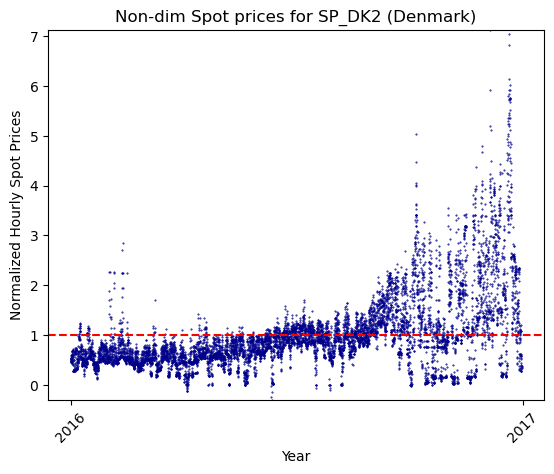

Number of values below average SP: 5704
max_dif: 6.121260559037821
min_dif: 1.2980178044385358


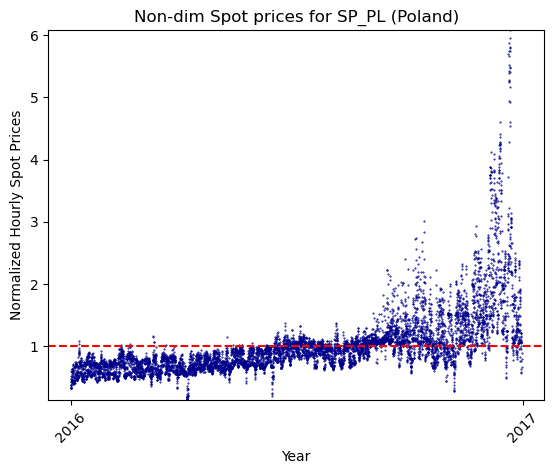

Number of values below average SP: 5607
max_dif: 5.080094186665556
min_dif: 0.8598315399143646


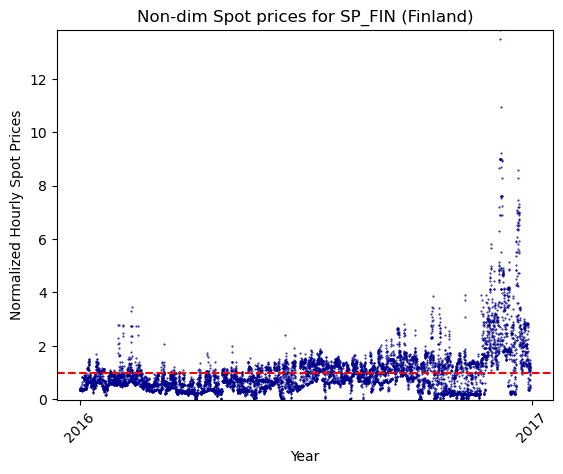

Number of values below average SP: 5511
max_dif: 12.823172121937434
min_dif: 1.0194893084403416


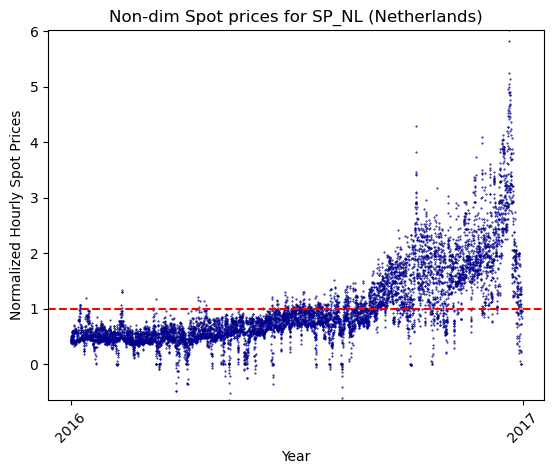

Number of values below average SP: 5870
max_dif: 5.0212444514281875
min_dif: 1.6427192867669644


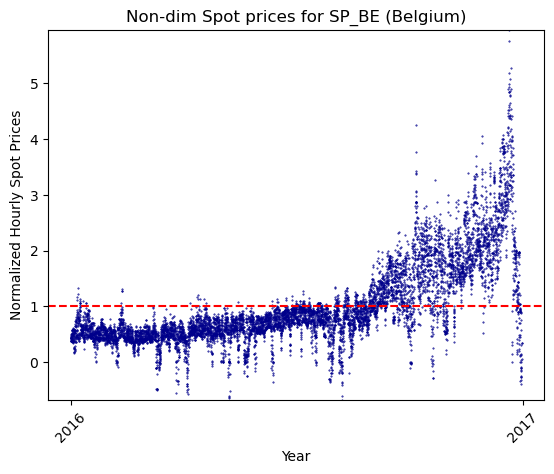

Number of values below average SP: 5964
max_dif: 4.9543082730180545
min_dif: 1.6722606114697816


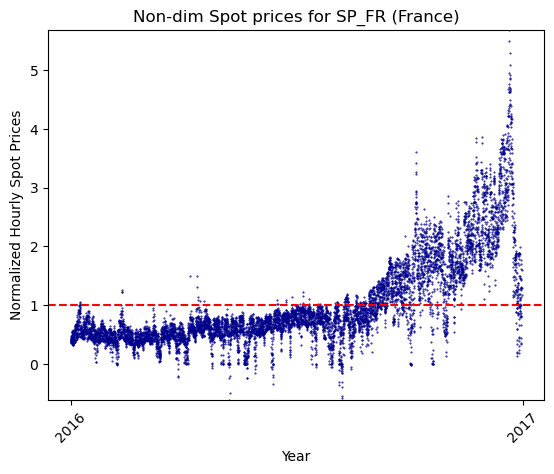

Number of values below average SP: 6057
max_dif: 4.678799116849693
min_dif: 1.6061660089566336


<Figure size 640x480 with 0 Axes>

In [10]:
# Data for SP for each country
df_FR_histSP = FR_df['Day Ahead Auction (FR)']
df_FIN_histSP = FIN_df['Day Ahead Auction (FI)']
df_BE_histSP = BE_df['Day Ahead Auction (BE)']
df_NL_histSP = NL_df['Day Ahead Auction (NL)']
df_DE_histSP = DE_df['Day Ahead Auction (DE-AT-LU)']
df_DK2_histSP = DK2_df['Day Ahead Auction (DK2)']
df_PL_histSP = PL_df['Day Ahead Auction (PL)']

start_year_indexes = [0, 8785, 17545, 26305, 35065, 43849, 52608]
year_labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
# year_labels = [2019, 2020, 2021, 2022]

def calculate_SP(SP_df, start_index, end_index):
    SP_data = SP_df.astype(float).iloc[start_index:end_index]
    avg_SP = SP_data.mean()
    norm_p = SP_data / avg_SP
    return norm_p, avg_SP

def plot_prices(SP_df, SP_name, avg_load, start_indexes, year_labels):
    x = range(len(SP_df))
    y = SP_df.values.flatten()
    valid_values = np.isfinite(y)  # Filter out NaN and Inf values
    y = y[valid_values]
    x = np.array(x)[valid_values]

    if len(y) == 0:
        print(f"No data available for {SP_name}")
        return

    avg_sp = SP_df.mean()
    plt.scatter(x, y, marker='o', s=0.2, color='darkblue')
    plt.axhline(y=avg_sp, color='red', linestyle='--')
    plt.xticks(start_indexes, year_labels, rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Normalized Hourly Spot Prices')
    plt.title(f'Non-dim Spot prices for {SP_name}')
    plt.ylim(min(y), max(y))
    plt.show()
    # Count the number of values below average SP
    num_below_avg = len(SP_df[SP_df < avg_sp])
    print(f"Number of values below average SP: {num_below_avg}")
    max_value = SP_df.max()
    min_value = SP_df.min()
    max_dif = max_value - avg_sp
    min_dif = avg_sp - min_value
    print(f"max_dif: {max_dif}")
    print(f"min_dif: {min_dif}")

# select start and end year: choose index
i_st_y=5
i_end_y=6
# ------------
ipl_st=0
ipl_end=i_end_y-i_st_y

# Germany
df_DE_histSP = df_DE_histSP.astype(float)
SP_DE, avg_SP_DE = calculate_SP(df_DE_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_DE, 'SP_DE (Germany)', avg_SP_DE, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
filename = 'scatter_plot_DE_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)

# Denmark
df_DK2_histSP = df_DK2_histSP.astype(float)
SP_DK2, avg_SP_DK2 = calculate_SP(df_DK2_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_DK2, 'SP_DK2 (Denmark)', avg_SP_DK2, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
filename = 'scatter_plot_DK2_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)

# Poland
df_PL_histSP = df_PL_histSP.astype(float)
SP_PL, avg_SP_PL = calculate_SP(df_PL_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_PL, 'SP_PL (Poland)', avg_SP_PL, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
filename = 'scatter_plot_PL_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)


# Finland
df_FIN_histSP = df_FIN_histSP.astype(float)
SP_FIN, avg_SP_FIN = calculate_SP(df_FIN_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_FIN, 'SP_FIN (Finland)', avg_SP_FIN, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
filename = 'scatter_plot_FIN_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)


# Netherlands
df_NL_histSP = df_NL_histSP.astype(float)
SP_NL, avg_SP_NL = calculate_SP(df_NL_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_NL, 'SP_NL (Netherlands)', avg_SP_NL, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
plt.show()
filename = 'scatter_plot_NL_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)


# Belgium
df_BE_histSP = df_BE_histSP.astype(float)
SP_BE, avg_SP_BE = calculate_SP(df_BE_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_BE, 'SP_BE (Belgium)', avg_SP_BE, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
filename = 'scatter_plot_BE_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)

# France
df_FR_histSP = df_FR_histSP.astype(float)
SP_FR, avg_SP_FR = calculate_SP(df_FR_histSP, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_prices(SP_FR, 'SP_FR (France)', avg_SP_FR, start_year_indexes[ipl_st:ipl_end+1], year_labels[ipl_st:ipl_end+1])
# %matplotlib agg
filename = 'scatter_plot_FR_2016-2021.png'  # Specify the filename
save_path = os.path.join(r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Graphs_py\Historical_SP', filename)
plt.savefig(save_path)


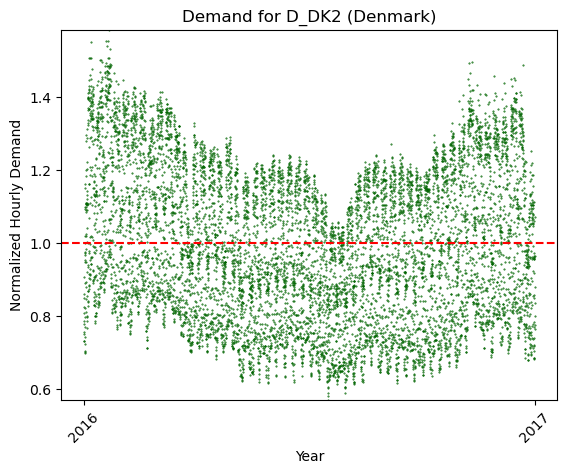

Number of values below average load: 4534
max_dif: 0.5826783209126343
min_dif: 0.42890414504111507
153.3978372225384


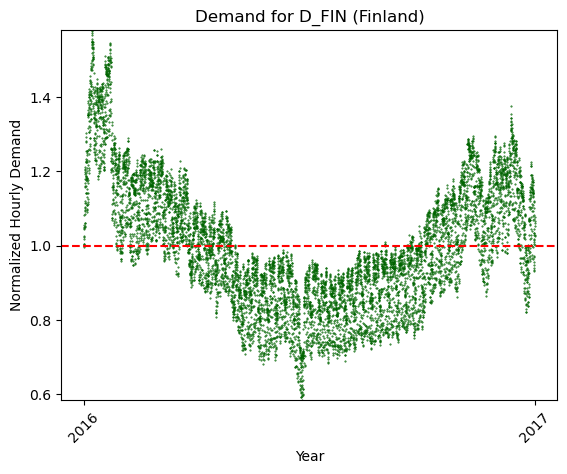

Number of values below average load: 4749
max_dif: 0.5801737397627
min_dif: 0.41489111262053724
160.6374501992032


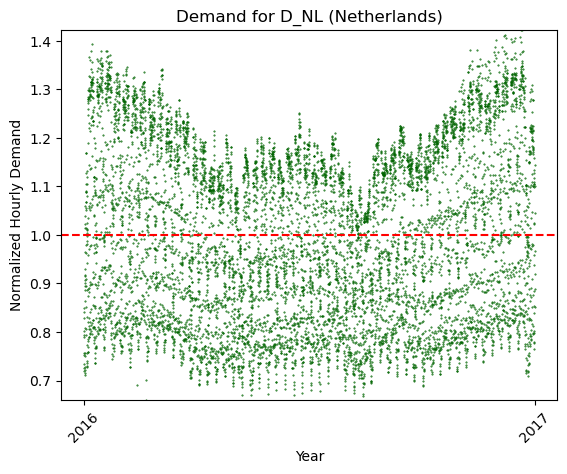

Number of values below average load: 4481
max_dif: 0.4221231050740042
min_dif: 0.33952217279653507


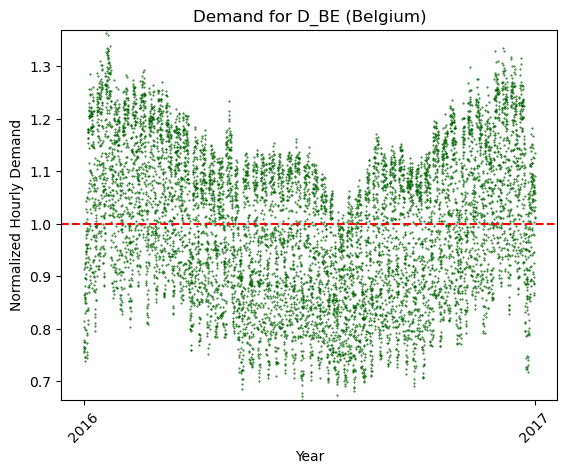

Number of values below average load: 4301
max_dif: 0.3691732506213019
min_dif: 0.3348528717816245


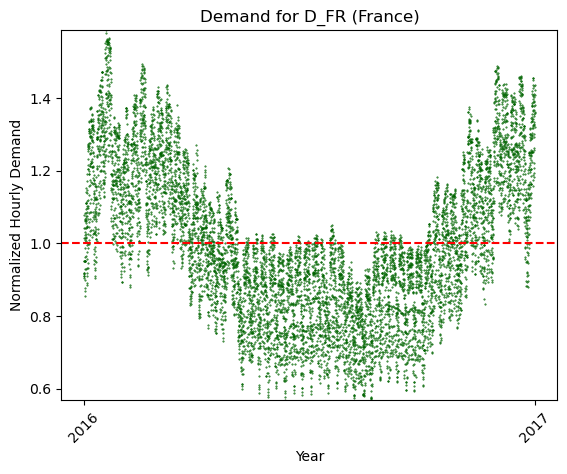

Number of values below average load: 4782
max_dif: 0.5860898562362958
min_dif: 0.43024974041377895
168.74217416050087


In [57]:
# DEMAND: d
start_year_indexes = [0, 8785, 17545, 26305, 35065, 43849, 52608]
year_labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

def calculate_demand(load_df, start_index, end_index):
    load_data = load_df.astype(float).iloc[start_index:end_index]
    avg_load = load_data.mean()
    demand = load_data / avg_load
    return demand, avg_load

# with errors
# Plotting Demands: 
# def plot_demands(dfL, dfL_name, avg_load, start_indexes):
def plot_demands(dfL, dfL_name, avg_load, start_indexes, year_labels):
    x = range(len(dfL))
    y = dfL.values.flatten()
    if len(y) == 0:
        print(f"No data available for {dfL_name}")
        return
    avg_load=dfL.mean()
    plt.scatter(x, y, marker='o', s=0.2, color='darkgreen')
    plt.axhline(y=avg_load, color='red', linestyle='--')
    plt.xticks(start_indexes, year_labels, rotation=45)
    # plt.xticks(start_indexes, rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Normalized Hourly Demand')
    plt.title(f'Demand for {dfL_name}')
    plt.ylim(min(y), max(y))
    plt.show()
    
    # Count the number of values below average load
    num_below_avg = len(dfL[dfL < avg_load])
    print(f"Number of values below average load: {num_below_avg}")
    max_value = dfL.max()
    min_value = dfL.min()
    max_dif = max_value - avg_load
    min_dif = avg_load - min_value
    print(f"max_dif: {max_dif}")
    print(f"min_dif: {min_dif}")

# --------------------------------------------------------------------------------------------------------------------------
# select start and end year: choose index
i_st_y=0
i_end_y=1
# --------------------------------------------------------------------------------------------------------------------------
# Germany
# df_DE_Load = df_DE_Load.astype(float)
# # D_DE, avg_D_DE = calculate_demand(df_DE_Load, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
# D_DE, avg_D_DE = calculate_demand(df_DE_Load, 0, 2160)
# plot_demands(D_DE, 'D_DE (Germany)', avg_D_DE, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# Denmark
df_DK2_Load = df_DK2_Load.astype(float)
D_DK2, avg_D_DK2 = calculate_demand(df_DK2_Load, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
# plot_demands(D_DK2, 'D_DK2 (Denmark)', avg_D_DK2, start_year_indexes[i_st_y:i_end_y+1])
plot_demands(D_DK2, 'D_DK2 (Denmark)', avg_D_DK2, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# MANUALLY from function: 
num_below_avg= 13476
perc_below_avg_DK2 = num_below_avg/start_year_indexes[i_end_y]
print(perc_below_avg_DK2*100)
# Finland
df_FIN_Load = df_FIN_Load.astype(float)
D_FIN, avg_D_FIN = calculate_demand(df_FIN_Load, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(D_FIN, 'D_FIN (Finland)', avg_D_FIN, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# MANUALLY from function: 
num_below_avg= 14112
perc_below_avg_FIN = num_below_avg/start_year_indexes[i_end_y]
print(perc_below_avg_FIN*100)

# Netherlands
df_NL_Load = df_NL_Load.astype(float)
D_NL, avg_D_NL = calculate_demand(df_NL_Load, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(D_NL, 'D_NL (Netherlands)', avg_D_NL, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# Belgium
df_BE_Load = df_BE_Load.astype(float)
D_BE, avg_D_BE = calculate_demand(df_BE_Load, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(D_BE, 'D_BE (Belgium)', avg_D_BE, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# France
df_FR_Load = df_FR_Load.astype(float)
D_FR, avg_D_FR = calculate_demand(df_FR_Load, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(D_FR, 'D_FR (France)', avg_D_FR, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# MANUALLY from function: 
num_below_avg= 14824
perc_below_avg_FR = num_below_avg/start_year_indexes[i_end_y]
print(perc_below_avg_FR*100)

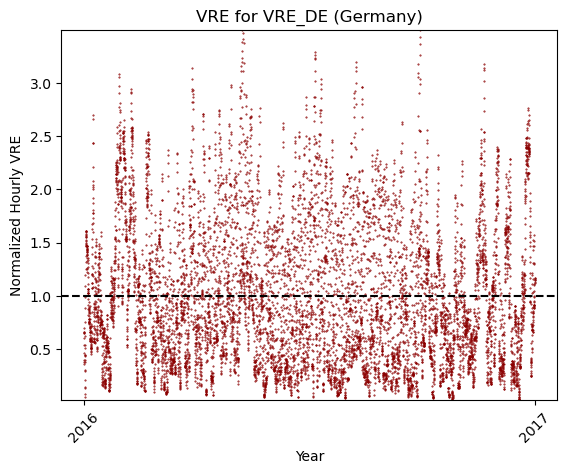

Number of values below average VRE generation: 5100
max_dif: 2.4970451803106273
min_dif: 0.9758049037017412


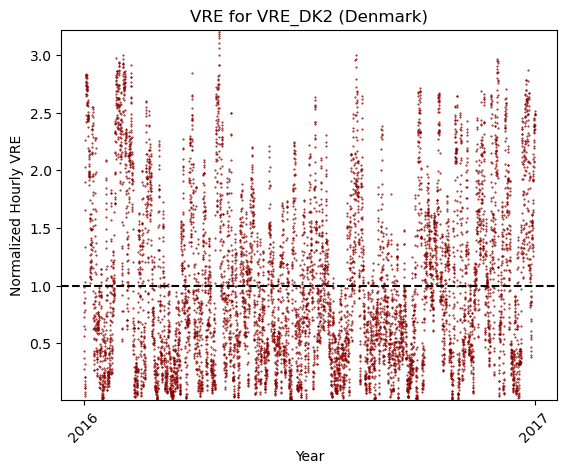

Number of values below average VRE generation: 5066
max_dif: 2.2172509607436703
min_dif: 0.987701055699626


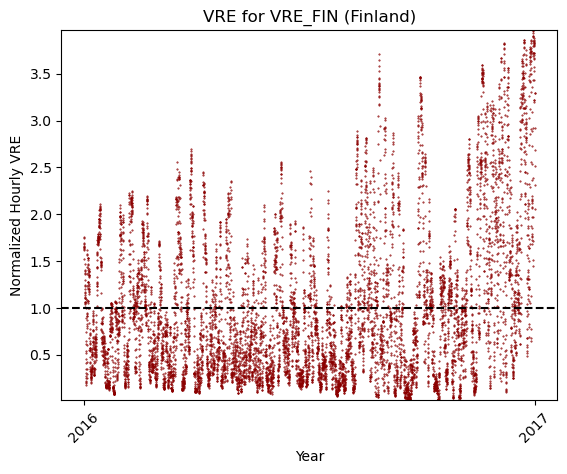

Number of values below average VRE generation: 5407
max_dif: 2.965922676549234
min_dif: 0.981588102708686


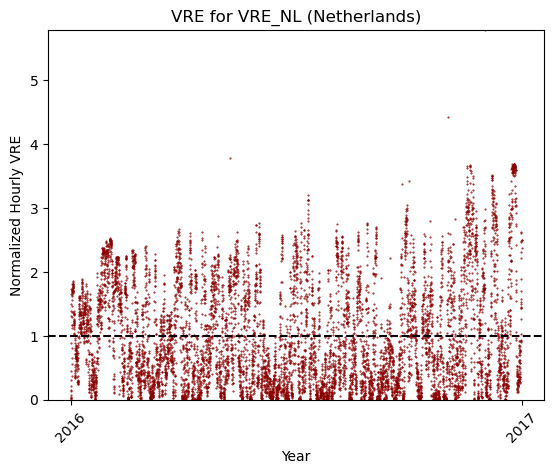

Number of values below average VRE generation: 5088
max_dif: 4.781103676955266
min_dif: 0.9999999999999952


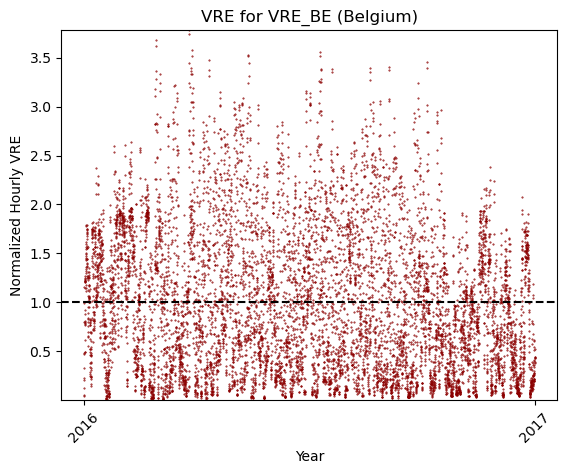

Number of values below average VRE generation: 4815
max_dif: 2.7808218764580275
min_dif: 0.9942505036327192


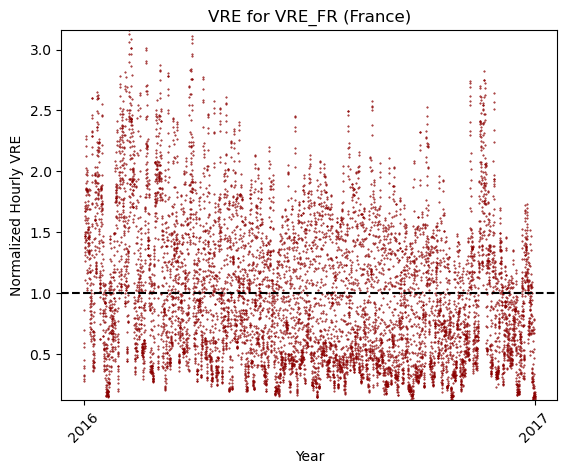

Number of values below average VRE generation: 4937
max_dif: 2.1594495147711052
min_dif: 0.8749835220192261


In [58]:
# VRE!!
# easy: but they are not filtered by year
VRE_DE = df_DE_solar + df_DE_wind_offshore + df_DE_wind_onshore
VRE_DK2 = df_DK2_solar + df_DK2_wind_offshore + df_DK2_wind_onshore
VRE_FR = df_FR_solar + df_FR_wind_onshore
VRE_NL = df_NL_solar + df_NL_wind_offshore + df_NL_wind_onshore
VRE_FIN = df_FIN_wind_onshore
VRE_PL = df_PL_solar + df_PL_wind_onshore
VRE_BE= df_BE_solar +df_BE_wind_offshore+df_BE_wind_onshore

# vre_automatization too:
start_year_indexes = [0, 8785, 17545, 26305, 35065, 43849, 52608]
year_labels = [2016, 2017, 2018, 2019, 2020, 2021, 2022]

def calculate_demand(load_df, start_index, end_index):
    load_data = load_df.astype(float).iloc[start_index:end_index]
    avg_load = load_data.mean()
    demand = load_data / avg_load
    return demand, avg_load


# Plotting Demands: 
def plot_demands(dfL, dfL_name, avg_load, start_indexes, year_labels):
    x = range(len(dfL))
    y = dfL.values.flatten()
    if len(y) == 0:
        print(f"No data available for {dfL_name}")
        return
    avg_load=dfL.mean()
    plt.scatter(x, y, marker='o', s=0.2, color='darkred')
    plt.axhline(y=avg_load, color='black', linestyle='--')
    plt.xticks(start_indexes, year_labels, rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Normalized Hourly VRE')
    plt.title(f'VRE for {dfL_name}')
    plt.ylim(min(y), max(y))
    plt.show()
       # Count the number of values below average load
    num_below_avg = len(dfL[dfL < avg_load])
    print(f"Number of values below average VRE generation: {num_below_avg}")
    max_value = dfL.max()
    min_value = dfL.min()
    max_dif = max_value - avg_load
    min_dif = avg_load - min_value
    print(f"max_dif: {max_dif}")
    print(f"min_dif: {min_dif}")
# --------------------------------------------------------------------------------------------------------------------------
# select start and end year: choose index
i_st_y=0
i_end_y=1
# --------------------------------------------------------------------------------------------------------------------------
# Germany
df_DE_VRE = VRE_DE.astype(float)
VRE_DE, avg_VRE_DE = calculate_demand(df_DE_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(VRE_DE, 'VRE_DE (Germany)', avg_VRE_DE, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# Denmark
df_DK2_VRE = VRE_DK2.astype(float)
VRE_DK2, avg_VRE_DK2 = calculate_demand(df_DK2_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(VRE_DK2, 'VRE_DK2 (Denmark)', avg_VRE_DK2, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# # Poland
# df_PL_VRE = VRE_PL.astype(float)
# VRE_PL, avg_VRE_PL = calculate_demand(df_PL_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
# plot_demands(VRE_PL, 'VRE_PL (Poland)', avg_VRE_PL, start_year_indexes[i_st_y:i_end_y], year_labels[i_st_y:i_end_y])

# Finland
df_FIN_VRE = VRE_FIN.astype(float)
VRE_FIN, avg_VRE_FIN = calculate_demand(df_FIN_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(VRE_FIN, 'VRE_FIN (Finland)', avg_VRE_FIN, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# Netherlands
df_NL_VRE = VRE_NL.astype(float)
VRE_NL, avg_VRE_NL = calculate_demand(df_NL_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(VRE_NL, 'VRE_NL (Netherlands)', avg_VRE_NL, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# Belgium
df_BE_VRE = VRE_BE.astype(float)
VRE_BE, avg_VRE_BE = calculate_demand(df_BE_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(VRE_BE, 'VRE_BE (Belgium)', avg_VRE_BE, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

# France
df_FR_VRE = VRE_FR.astype(float)
VRE_FR, avg_VRE_FR = calculate_demand(df_FR_VRE, start_year_indexes[i_st_y], start_year_indexes[i_end_y])
plot_demands(VRE_FR, 'VRE_FR (France)', avg_VRE_FR, start_year_indexes[i_st_y:i_end_y+1], year_labels[i_st_y:i_end_y+1])

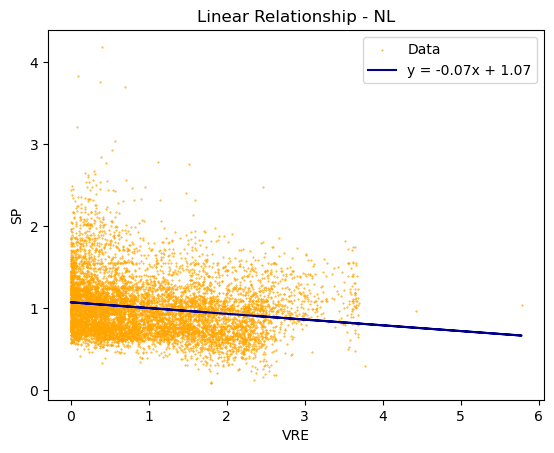

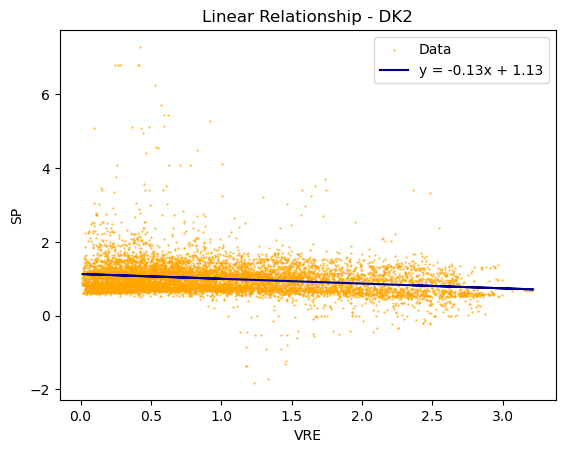

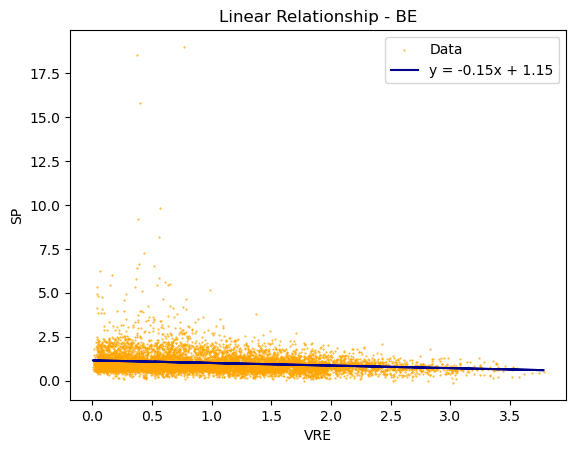

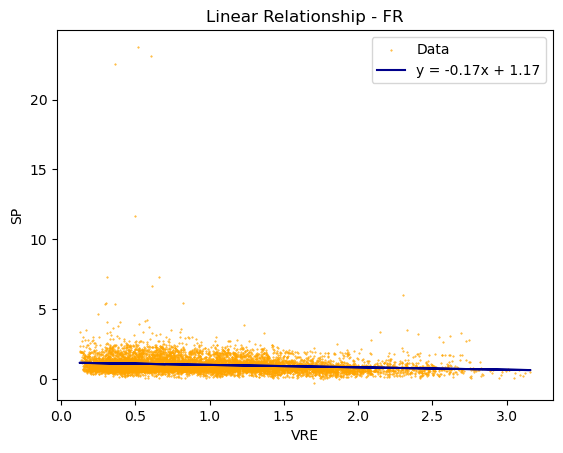

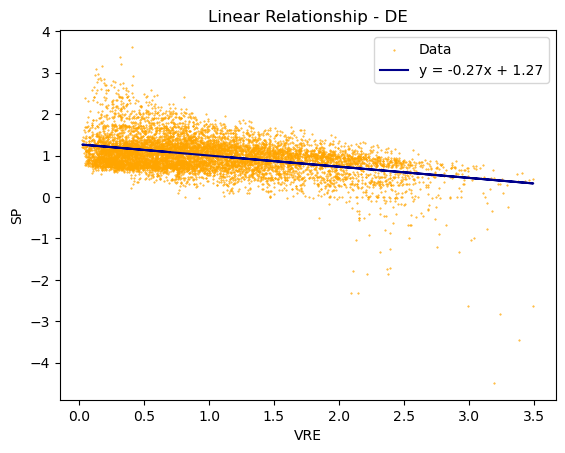

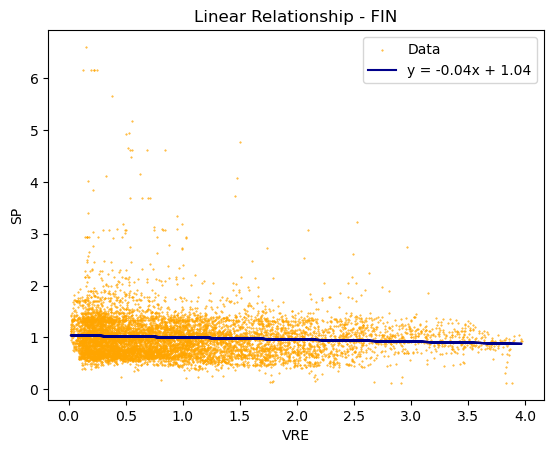

Country: NL
Slope (m): -0.070168636047667
Intercept (n): 1.0701342028667864
Correlation: nan

Country: DK2
Slope (m): -0.1294722722585364
Intercept (n): 1.1294722722585393
Correlation: -0.20610503072734856

Country: BE
Slope (m): -0.14734145783688135
Intercept (n): 1.1473414578368804
Correlation: -0.1669960803575871

Country: FR
Slope (m): -0.17182673697287884
Intercept (n): 1.1718267369728779
Correlation: -0.15308421725863666

Country: DE
Slope (m): -0.2696320224114434
Intercept (n): 1.2696320224114426
Correlation: -0.4159811321563607

Country: FIN
Slope (m): -0.04073146702350067
Intercept (n): 1.0406879950967014
Correlation: nan



In [59]:
# correlation btw VRE and SP: problem, different sizes
data= {
    'NL': (VRE_NL, SP_NL),
    'DK2': (VRE_DK2, SP_DK2),
    'BE': (VRE_BE, SP_BE),
    'FR': (VRE_FR, SP_FR),
    'DE': (VRE_DE, SP_DE),
    'FIN': (VRE_FIN, SP_FIN),
    # 'PL': (VRE_PL, SP_PL),
}

slopes = {}
intercepts = {}
correlations = {}

for country, (RL, SP) in data.items():

    nan_mask = np.isnan(RL) | np.isnan(SP)

    RL_no_nan = RL[~nan_mask]
    SP_no_nan = SP[~nan_mask]

    m, n = np.polyfit(RL_no_nan, SP_no_nan, 1)

    correlation = np.corrcoef(RL, SP)[0, 1]

    slopes[f"m_{country}_{i_st_y}_{i_end_y}"] = m
    intercepts[f"n_{country}_{i_st_y}_{i_end_y}"] = n
    correlations[f"corr_{country}_{i_st_y}_{i_end_y}"] = correlation

    line = f'y = {m:.2f}x + {n:.2f}'

    plt.scatter(RL, SP, color='orange', label='Data', s=0.2)
    plt.plot(RL, m * RL + n, color='darkblue', label=line)
    plt.xlabel('VRE')
    # plt.xlabel('D')
    plt.ylabel('SP')
    plt.title(f'Linear Relationship - {country}')
    plt.legend()
    plt.show()

slopes_df = pd.DataFrame.from_dict(slopes, orient='index', columns=['Slope'])
intercepts_df = pd.DataFrame.from_dict(intercepts, orient='index', columns=['Intercept'])
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

# Print the slopes, intercepts, and correlations for all countries
for country in data:
    print(f'Country: {country}')
    print('Slope (m):', slopes[f"m_{country}_{i_st_y}_{i_end_y}"])
    print('Intercept (n):', intercepts[f"n_{country}_{i_st_y}_{i_end_y}"])
    print('Correlation:', correlations[f"corr_{country}_{i_st_y}_{i_end_y}"])
    print()

WHAT IS THE CORRELATION BTW MY PLANT GENERATION AND THE NORMALIZED SPOT PRICES (COMPARED TO THE VRE-SP LINEAR RELATIONSHIP)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read and convert to datetime the CSV generation files
df_P_100 = pd.read_csv("P_w_100.csv")
df_P_150 = pd.read_csv("P_w_150.csv")
df_P_PV = pd.read_csv("P_PV.csv")

df_P_100['time'] = pd.to_datetime(df_P_100['time'], utc=True)
df_P_150['time'] = pd.to_datetime(df_P_150['time'], utc=True)
df_P_PV['time'] = pd.to_datetime(df_P_PV['time'], utc=True)

def filter_on_year(df: pd.DataFrame, year: int):
    """This functions filters a dataframe on a year using the utc_timestamp column.

    Args:
        year (int): year e.g. 2017
    Return:
        df: a dataframe filter on the year parameter
    """
    return df[df['time'].dt.year == year]

sel_year= 2020

# automatize for all dataframes
df_sel_year_w100= filter_on_year(df=df_P_100, year=sel_year)
df_sel_year_w150= filter_on_year(df=df_P_150, year=sel_year)
df_sel_year_PV= filter_on_year(df=df_P_PV, year=sel_year)

# countries
loc_w = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
loc_s = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']
c = ['NL', 'BE', 'DE', 'DK2', 'FIN', 'FR', 'PL']
countries = ["Germany", "France", "Belgium", "Poland", "Finland", "Netherlands", "Denmark"]


In [64]:
#  PLANT GENERATION VS NORM SPOT PRICE

for plant in loc_w:
    plant_gen_100 = df_sel_year_w100[plant]
    SP_pl100_gen = globals()SP_{plant}[1:]

    # Calculate linear correlation
    correlation_coeff = np.corrcoef(plant_gen_100, SP_pl100_gen)[0, 1]
    slope, intercept = np.polyfit(plant_gen_100, SP_pl100_gen, deg=1)

    # Scatter plot with linear correlation
    plt.scatter(plant_gen_100, SP_pl100_gen, s=0.2, color='orange')
    plt.plot(plant_gen_100, slope * np.array(plant_gen_100) + intercept, color='red')
    plt.xlabel(f'{plant}_plant_gen')
    plt.ylabel(f'SP_{plant}_plant_gen')
    plt.title('Scatter Plot with Linear Correlation')
    line_equation = f'Line Equation: y = {slope:.2f}x + {intercept:.2f}'
    correlation_info = f'Correlation coefficient: {correlation_coeff:.2f}'
    legend_text = f'{line_equation}\n{correlation_info}'
    plt.legend([legend_text])
    plt.show()

for plant in loc_w:
    plant_gen_150 = df_sel_year_w150[plant]
    SP_pl150_gen = SP_{plant}[1:]

    # Calculate linear correlation
    correlation_coeff = np.corrcoef(plant_gen_150, SP_pl150_gen)[0, 1]
    slope, intercept = np.polyfit(plant_gen_150, SP_pl150_gen, deg=1)

    # Scatter plot with linear correlation
    plt.scatter(plant_gen_150, SP_pl150_gen, s=0.2, color='orange')
    plt.plot(plant_gen_150, slope * np.array(plant_gen_150) + intercept, color='red')
    plt.xlabel(f'{plant}_plant_gen')
    plt.ylabel(f'SP_{plant}_plant_gen')
    plt.title('Scatter Plot with Linear Correlation')
    line_equation = f'Line Equation: y = {slope:.2f}x + {intercept:.2f}'
    correlation_info = f'Correlation coefficient: {correlation_coeff:.2f}'
    legend_text = f'{line_equation}\n{correlation_info}'
    plt.legend([legend_text])
    plt.show()

for plant in loc_s:
    plant_gen = df_sel_year_PV[plant]
    SP_plant_gen = SP_{plant}[1:]

    # Calculate linear correlation
    correlation_coeff = np.corrcoef(plant_gen, SP_plant_gen)[0, 1]
    slope, intercept = np.polyfit(plant_gen, SP_plant_gen, deg=1)

    # Scatter plot with linear correlation
    plt.scatter(plant_gen, SP_plant_gen, s=0.2, color='orange')
    plt.plot(plant_gen, slope * np.array(plant_gen) + intercept, color='red')
    plt.xlabel(f'{plant}_plant_gen')
    plt.ylabel(f'SP_{plant}_plant_gen')
    plt.title('Scatter Plot with Linear Correlation')
    line_equation = f'Line Equation: y = {slope:.2f}x + {intercept:.2f}'
    correlation_info = f'Correlation coefficient: {correlation_coeff:.2f}'
    legend_text = f'{line_equation}\n{correlation_info}'
    plt.legend([legend_text])
    plt.show()


SyntaxError: invalid syntax (2693616121.py, line 5)

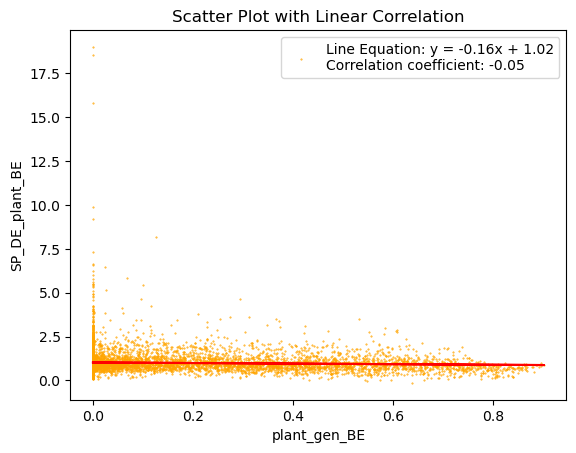

In [66]:
# singular example:
plant_gen_DE=df_sel_year_PV['LOC_6']
plant_gen=plant_gen_DE
SP_DE_plant_gen= SP_BE[1:]
SP_plant_gen=SP_DE_plant_gen
correlation_coeff = np.corrcoef(plant_gen, SP_plant_gen)[0, 1]
slope, intercept = np.polyfit(plant_gen, SP_plant_gen, deg=1)

# Create the scatter plot with linear realtionship btw plant generation and spot prices
plt.scatter(plant_gen, SP_plant_gen, s=0.2, color= 'orange')

plt.plot(plant_gen, slope * np.array(plant_gen) + intercept, color='red')

plt.xlabel('plant_gen_BE')
plt.ylabel('SP_DE_plant_BE')
plt.title('Scatter Plot with Linear Correlation')
# plt.text(0.5, 9, f'Correlation coefficient: {correlation_coeff:.2f}', fontsize=12)
line_equation = f'Line Equation: y = {slope:.2f}x + {intercept:.2f}'
correlation_info = f'Correlation coefficient: {correlation_coeff:.2f}'
legend_text = f'{line_equation}\n{correlation_info}'
plt.legend([legend_text])
plt.show()


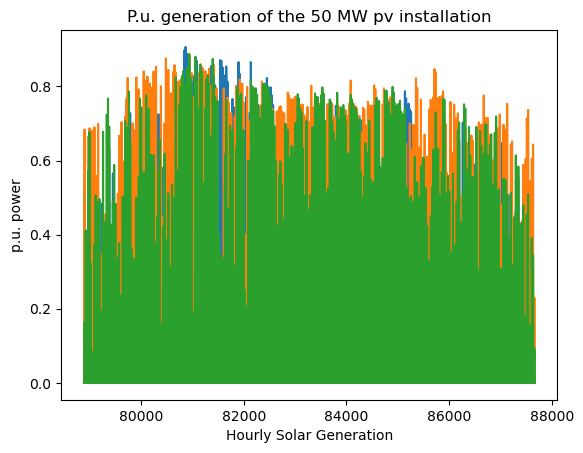

LOC_5.2: 1601.2052999999999
LOC_8.2: 1330.8255
LOC_9: 1272.4359
LOC_1: 1204.3321
LOC_7: 1186.4266
LOC_6: 1162.2139
LOC_10: 1157.3129999999999
LOC_4.2: 1155.4530999999997
LOC_2: 1111.2459
LOC_3: 1093.4714


In [53]:
# WHATS WRONG WITH SOLAR: slightly different but not much
# plt.plot(df_sel_year_PV['LOC_1'])
# plt.plot(df_sel_year_PV['LOC_2'])
# plt.plot(df_sel_year_PV['LOC_3'])
plt.plot(df_sel_year_PV['LOC_4.2'])
plt.plot(df_sel_year_PV['LOC_5.2'])
# plt.plot(df_sel_year_PV['LOC_6'])
# plt.plot(df_sel_year_PV['LOC_7'])
plt.plot(df_sel_year_PV['LOC_8.2'])
# plt.plot(df_sel_year_PV['LOC_9'])
# plt.plot(df_sel_year_PV['LOC_10'])
plt.xlabel('Hourly Solar Generation')
plt.ylabel('p.u. power')
plt.title('P.u. generation of the 50 MW pv installation')
plt.show()

# which country has more annual production:
country_production = {
    'LOC_1': df_sel_year_PV['LOC_1'].sum(),
    'LOC_2': df_sel_year_PV['LOC_2'].sum(),
    'LOC_3': df_sel_year_PV['LOC_3'].sum(),
    'LOC_4.2': df_sel_year_PV['LOC_4.2'].sum(),
    'LOC_5.2': df_sel_year_PV['LOC_5.2'].sum(),
    'LOC_6': df_sel_year_PV['LOC_6'].sum(),
    'LOC_7': df_sel_year_PV['LOC_7'].sum(),
    'LOC_8.2': df_sel_year_PV['LOC_8.2'].sum(),
    'LOC_9': df_sel_year_PV['LOC_9'].sum(),
    'LOC_10': df_sel_year_PV['LOC_10'].sum()
}
sorted_production = sorted(country_production.items(), key=lambda x: x[1], reverse=True)
for country, production in sorted_production:
    print(f"{country}: {production}")